<a href="https://colab.research.google.com/github/x-Lysandre/MovieGenreClassification/blob/main/MovieGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE GENRE CLASSIFICATION

Problem statement: To classify movies based on thier genre.  
Steps to perform:  
Step 1: load the data.  
Step 2: Preprocess the data  
Step 3: Perform Exploratory Data Analysis (EDA)  
Step 4: Split the dataset  
Step 5: Train a classification model  
Step 6: Evaluate the model


In [17]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 1: Loading the data from the drive

In [18]:
#Loading the data into train and test
train = pd.read_csv('/content/drive/MyDrive/MOVIE GENRE CLASSIFICATION/train_data.txt/train_data.txt', sep = ':::', names=['id', 'title', 'genre', 'description'], engine = 'python')
test = pd.read_csv('/content/drive/MyDrive/MOVIE GENRE CLASSIFICATION/test_data.txt/test_data.txt', sep = ':::', names = ['id', 'title', 'description'], engine = 'python')

In [19]:
train

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [20]:
test

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


## Step 2: Preprocessing the data
We have to convert the text data into numerical data so that the computer can understand it.  
   
TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a technique used to convert text data into numerical features. TF-IDF takes into account:

* Term Frequency (TF): How often a word appears in a document.
* Inverse Document Frequency (IDF): How rare a word is across the entire corpus.


In [21]:
train.isnull().sum() #checking for null values

,0
id,0
title,0
genre,0
description,0


In [22]:
train["title"] = train["title"].str.replace(r"\s*\(\d{4}\)", "", regex=True)  # Removes (1998), (2010), etc.
train["title"] = train["title"].str.replace(r"\s*\(\?{4}\)", "", regex=True)  # Removes (?), (??), (???), (????)
train

,id,title,genre,description
0,1,Oscar et la dame rose,drama,Listening in to a conversation between his do...
1,2,Cupid,thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...
3,4,The Secret Sin,drama,To help their unemployed father make ends mee...
4,5,The Unrecovered,drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino""",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry,horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed,comedy,Walter and Vivian live in the country and hav...


In [23]:
test["title"] = test["title"].str.replace(r"\s*\(\d{4}\)", "", regex=True)  # Removes (1998), (2010), etc.
test["title"] = test["title"].str.replace(r"\s*\(\?{1,4}\)", "", regex=True)  # Removes (?), (??), (???), (????)
test

,id,title,description
0,1,Edgar's Lunch,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai,Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark""","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream,"Popular, but mysterious rock D.J Mike Mallard..."


We are going to create a new text feature by combining the movie title and description to enhance the dataset for classification.  
For that we are creating a new data frame:
`train_text_features`

In [24]:
train_title = train.iloc[:,1] #extracting the 1st column

train_genre = train.iloc[:,2] #extracting the 2nd column

train_description =train.iloc[:,3] #extracting the 3rd column

train_text_features = train_title + train_description
train_text_features

,0
0,Oscar et la dame rose Listening in to a conv...
1,Cupid A brother and sister with a past inces...
2,"Young, Wild and Wonderful As the bus empties..."
3,The Secret Sin To help their unemployed fath...
4,The Unrecovered The film's title refers not ...
...,...
54209,"""Bonino"" This short-lived NBC live sitcom ce..."
54210,Dead Girls Don't Cry The NEXT Generation of ...
54211,Ronald Goedemondt: Ze bestaan echt Ze bestaa...
54212,Make Your Own Bed Walter and Vivian live in ...


In [25]:
test_title = test.iloc[:,1] #extracting the 1st column
test_description = test.iloc[:,2] #extracting the 2nd column

test_text_features = test_title + test_description
test_text_features

,0
0,Edgar's Lunch L.R. Brane loves his life - hi...
1,"La guerra de papá Spain, March 1964: Quico i..."
2,Off the Beaten Track One year in the life of...
3,"Meu Amigo Hindu His father has died, he hasn..."
4,Er nu zhai Before he was known international...
...,...
54195,"""Tales of Light & Dark"" Covering multiple ge..."
54196,Der letzte Mohikaner As Alice and Cora Munro...
54197,Oliver Twink A movie 169 years in the making...
54198,"Slipstream Popular, but mysterious rock D.J ..."


In [26]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=5000) #converting the text into numerical values

In [27]:
train_features = vectorizer.fit_transform(train_text_features)
test_features = vectorizer.transform(test_text_features)

In [28]:
train_genre

,genre
0,drama
1,thriller
2,adult
3,drama
4,drama
...,...
54209,comedy
54210,horror
54211,documentary
54212,comedy


<ipython-input-33-2f7d71c84be0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre' , data=train , order=train['genre'].value_counts().index, palette = 'viridis')


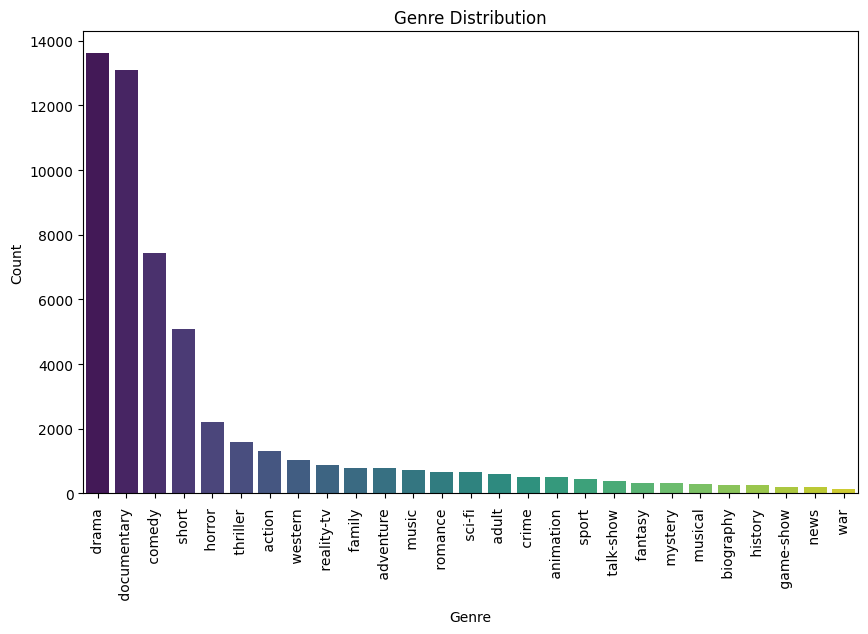

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='genre' , data=train , order=train['genre'].value_counts().index, palette = 'viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Step 3: Splitting the data  
Into training and validation set

In [34]:
x_train, x_val, y_train, y_val = train_test_split(train_features, train_genre, test_size = 0.2, random_state = 42)

## Step 4: Training the model

In [39]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

## Step5 : Evaluating the model

In [40]:
y_val_pred = model.predict(x_val)

In [41]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", val_accuracy)
print("Classification report: ", classification_report(y_val, y_val_pred))

Validation Accuracy:  0.5245780688001476
Classification report:                 precision    recall  f1-score   support

      action        0.58      0.10      0.17       263
       adult        0.71      0.04      0.08       112
   adventure        0.38      0.04      0.08       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.44      0.48      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.88      0.69      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.39      0.51       431
       music        0.94      0.12      0.21       144
     musical        0.00      0.00      0.00        50

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


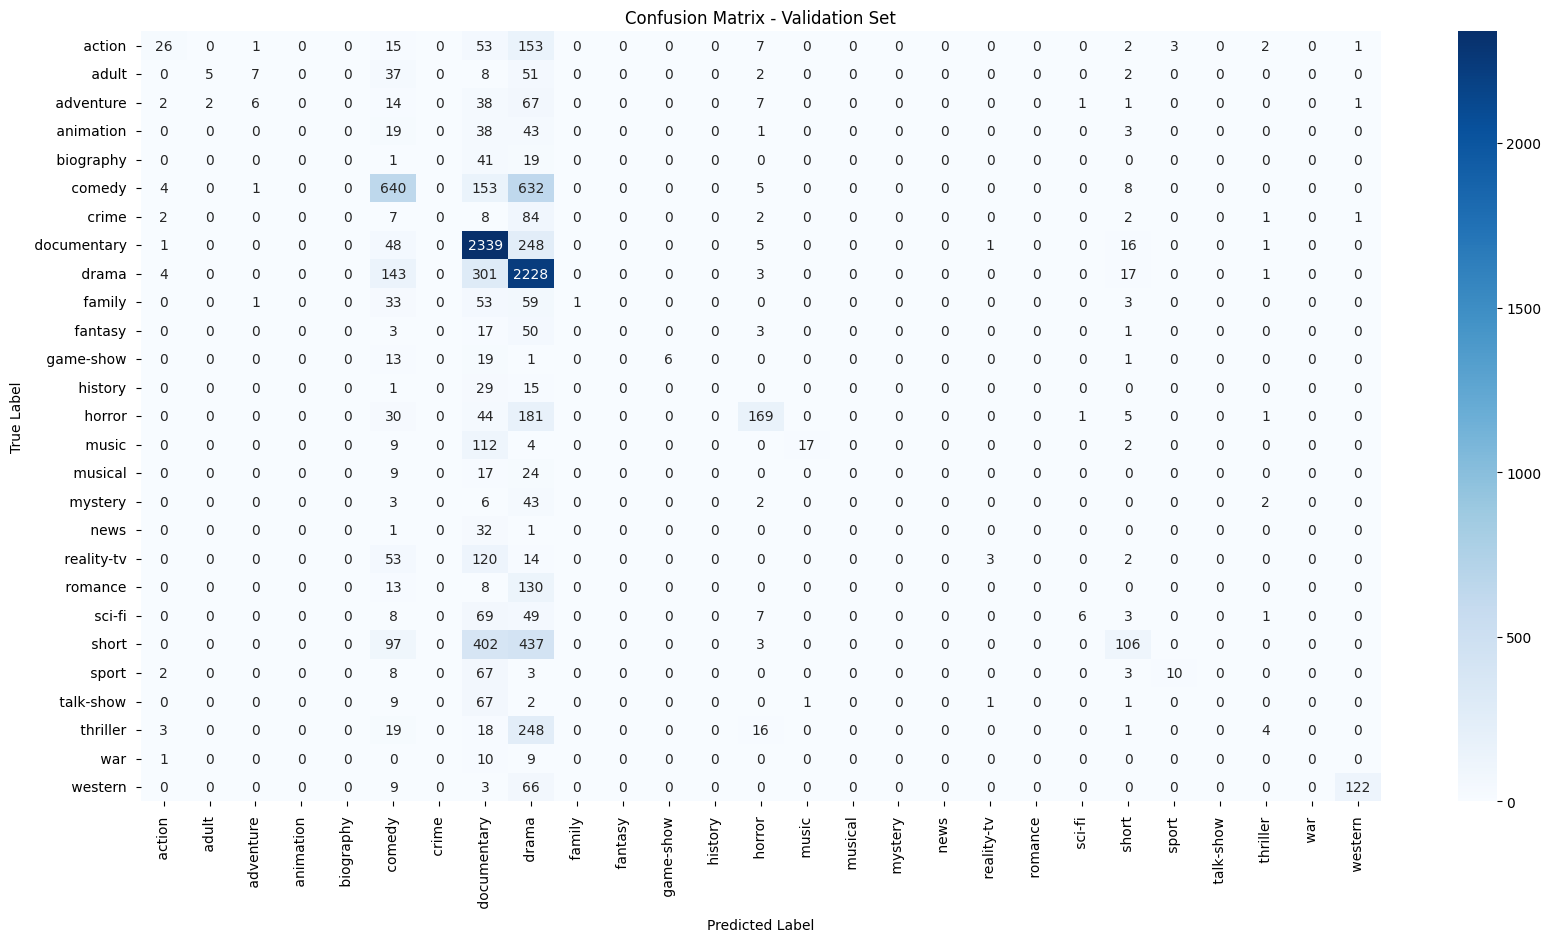

In [42]:
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(20,10))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Validation Set")
plt.show()

# Alternative Approaches
Trying different machine learning and deep learning models for improved classification accuracy.

In [45]:
X_train_dense = x_train.toarray()
X_val_dense = x_val.toarray()

# Using Gussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_dense, y_train)
y_pred = model.predict(X_val_dense)

In [47]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", val_accuracy)
print("Classification report: ", classification_report(y_val, y_val_pred))

Validation Accuracy:  0.5245780688001476
Classification report:                 precision    recall  f1-score   support

      action        0.58      0.10      0.17       263
       adult        0.71      0.04      0.08       112
   adventure        0.38      0.04      0.08       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.44      0.48      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.88      0.69      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.39      0.51       431
       music        0.94      0.12      0.21       144
     musical        0.00      0.00      0.00        50

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying Logistic Regression for better accuracy

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_dense, y_train)
y_pred = model.predict(X_val_dense)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", val_accuracy)
print("Classification report: ", classification_report(y_val, y_val_pred))


Validation Accuracy:  0.5245780688001476
Classification report:                 precision    recall  f1-score   support

      action        0.58      0.10      0.17       263
       adult        0.71      0.04      0.08       112
   adventure        0.38      0.04      0.08       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.44      0.48      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.88      0.69      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.39      0.51       431
       music        0.94      0.12      0.21       144
     musical        0.00      0.00      0.00        50

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
